# Weekly project
This weeks weekly project is a continuation of last weeks exercises.

You are to make a handwritten number classifier. Where we will be using the [mnist dataset](https://en.wikipedia.org/wiki/MNIST_database).

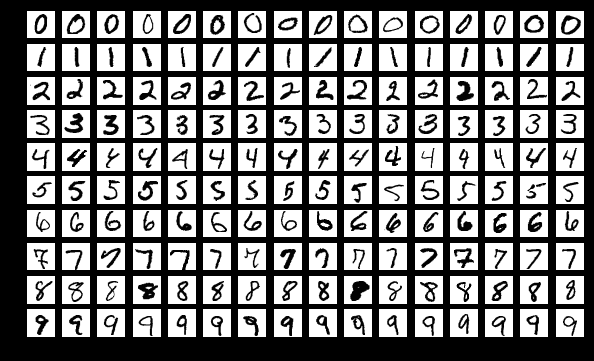

**Create a program that given an image from the mnist dataset.**
- You are free to use any algorithm you want to achieve this.
- It should be able to given a number classify what number it is.
- Accuracy should at least be 80%

If you decide to use a svm make sure you also use dimensionality reduction. SVM of the full mnist dataset will take around 4-8 hours depending on your pc.



**Challange:**
- Try to reach 98% accuracy.
- Try to classify faces with the labeled wild faces dataset [lwf](http://vis-www.cs.umass.edu/lfw/)
```{Python}
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
from sklearn.decomposition import PCA
from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_openml

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mnist = fetch_openml('mnist_784', version=1)

images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()

print(images.shape)
print(targets.shape)

(70000, 784)
(70000,)


8


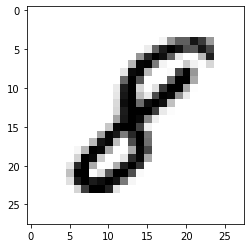

In [2]:
import cv2
a=7777
print(targets[a])
img = images[a]
img = np.reshape(img,(28,28))
plt.imshow(img, cmap=plt.cm.gray_r)

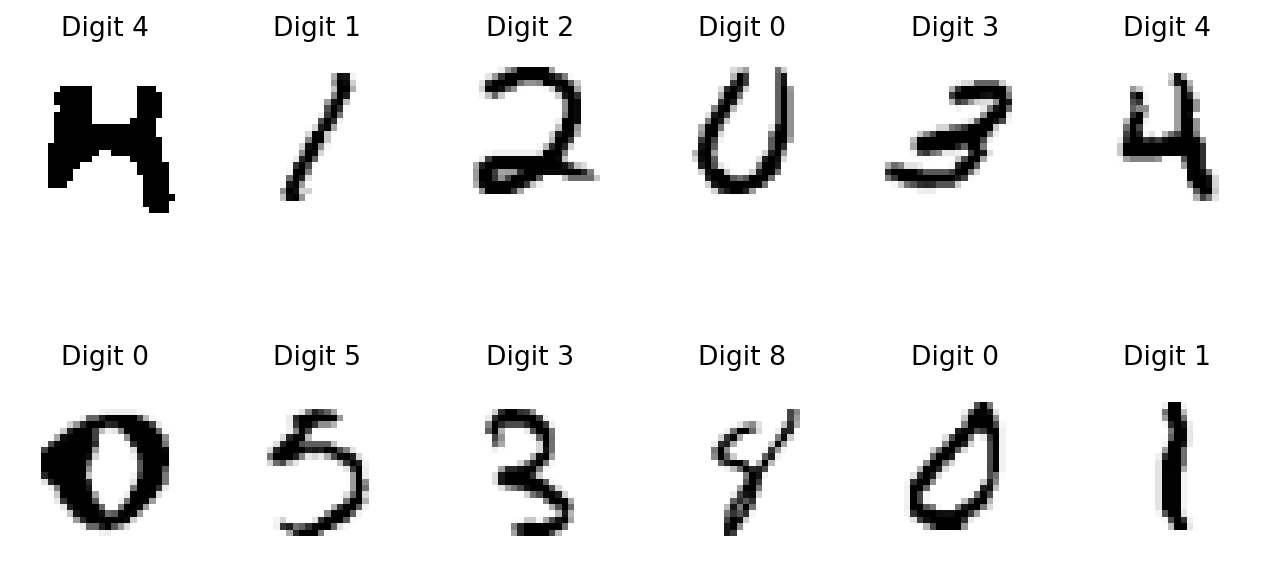

In [3]:
def show_some_digits(images, targets, sample_size=24, title_text='Digit {}' ):
    '''
    Visualize random digits in a grid plot
    images - array of flatten gidigs [:,784]
    targets - final labels
    '''
    nsamples=sample_size
    rand_idx = np.random.choice(images.shape[0], nsamples)
    images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))


    img = plt.figure(1, figsize=(10, 5), dpi=160)
    for index, (image, label) in enumerate(images_and_labels):
        plt.subplot(int(np.ceil(nsamples/6.0)), 6, index + 1)
        plt.axis('off')
        #each image is flat, we have to reshape to 2D array 28x28-784
        plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(label))
    plt.show()

# draw 12 images along with their labels
show_some_digits(images, targets, 12)

In [31]:
training_img = images[:60000,:]

training_trgt = targets[:60000]

test_img = images[60000:,:]

test_trgt = targets[60000:]

x_train = training_img

x_test = test_img

y_train = training_trgt

y_test = test_trgt

np.shape(y_test)

(10000,)

In [44]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [50]:
x_train.shape

(60000, 28, 28, 1)

In [45]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [46]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# import tensorflow as tf
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [47]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2138 - accuracy: 0.9348
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0873 - accuracy: 0.9736
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0602 - accuracy: 0.9807
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0428 - accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0371 - accuracy: 0.9877
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0284 - accuracy: 0.99052s - loss: 0.0288 - ac - E
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0247 - accuracy: 0.99163s - loss:
Epoch 8/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0216 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0199 - accuracy: 0.99340s
Epoch 10/10
1875/1875 [===

9


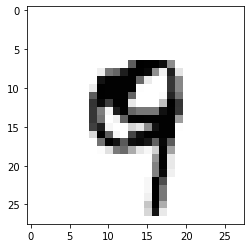

In [58]:

image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())


In [60]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 17s 9ms/step - loss: 0.0042 - accuracy: 0.9988


[0.004227866418659687, 0.9987666606903076]